In [1]:
import math
from inspect import isfunction
from functools import partial

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange, reduce
from einops.layers.torch import Rearrange

import torch
from torch import nn, einsum
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from Unet import *
from DiffusionModel import *

In [2]:
# define hyperparameters

image_size = 32
channel = 1

batchsize = 128

timestep = 1000
length = 100

lr = 1e-3
epochs = 1

dimmults = (1,2,4,8)

device = "cuda:0" if torch.cuda.is_available() else "cpu"
#device = "cpu"
print(device)

cuda:0


In [3]:
# sample from loaded models

loaded_linear_net = Unet(
    dim=image_size,
    channels=channel,
    dim_mults=dimmults
)
loaded_linear_net, loaded_linear_betas, loaded_linear_sampling_1, loaded_linear_sampling_2= load_net_betas(loaded_linear_net, device, "DDIM_model")

tau : 999
tau : 997
tau : 976
tau : 943
tau : 941
tau : 930
tau : 928
tau : 919
tau : 916
tau : 908
tau : 902
tau : 897
tau : 894
tau : 867
tau : 861
tau : 851
tau : 844
tau : 830
tau : 810
tau : 798
tau : 785
tau : 751
tau : 730
tau : 720
tau : 718
tau : 714
tau : 697
tau : 688
tau : 681
tau : 676
tau : 660
tau : 656
tau : 644
tau : 642
tau : 633
tau : 625
tau : 624
tau : 615
tau : 600
tau : 596
tau : 559
tau : 551
tau : 546
tau : 545
tau : 541
tau : 538
tau : 536
tau : 528
tau : 508
tau : 495
tau : 487
tau : 482
tau : 475
tau : 474
tau : 459
tau : 457
tau : 426
tau : 422
tau : 420
tau : 418
tau : 393
tau : 385
tau : 365
tau : 349
tau : 347
tau : 335
tau : 332
tau : 323
tau : 315
tau : 312
tau : 295
tau : 283
tau : 279
tau : 276
tau : 237
tau : 234
tau : 231
tau : 215
tau : 214
tau : 208
tau : 198
tau : 197
tau : 171
tau : 160
tau : 145
tau : 130
tau : 114
tau : 105
tau : 98
tau : 91
tau : 89
tau : 88
tau : 82
tau : 78
tau : 77
tau : 68
tau : 63
tau : 58
tau : 35
tau : 12
tau : 2
tau 

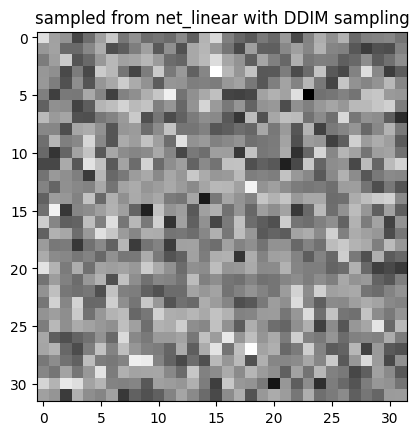

In [4]:
alphas = torch.cumprod(1. - loaded_linear_betas, axis=0)
linear_sqrt_alphas = torch.sqrt(alphas)
linear_sqrt_one_minus_alphas = torch.sqrt(1. - alphas)

init_noise = torch.randn((1,1,32,32))

res:torch.Tensor = sampling_DDIM(timestep,
                                 linear_sqrt_alphas,
                                 linear_sqrt_one_minus_alphas,
                                 loaded_linear_net,
                                 device,
                                 noise=init_noise,
                                 length=length)

plt.figure()
plt.title("sampled from net_linear with DDIM sampling")
plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

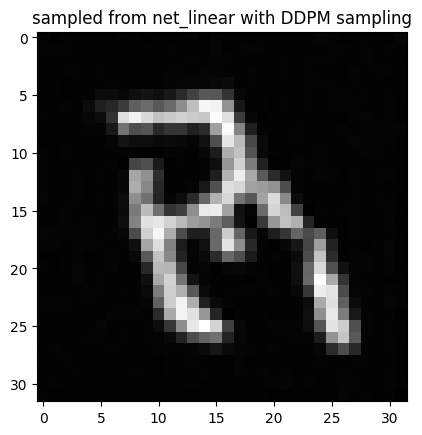

In [5]:
# sampling - DDPM

res_2:torch.Tensor = sampling(timestep,
                              loaded_linear_betas,
                              loaded_linear_sampling_1,
                              loaded_linear_sampling_2,
                              loaded_linear_net,
                              device,
                              init_noise)
plt.figure()
plt.title("sampled from net_linear with DDPM sampling")
plt.imshow(res_2.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')